In [258]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [259]:
sample_size = 30
ratio = 0.2
sigma_prime = 0.5   
sigma = 2
sigma_comulative = np.sqrt((ratio*sample_size*(sigma_prime**2) + (1-ratio)*sample_size*(sigma**2))/(sample_size-1))
mean1 = 0.0
mean_ = 2
mean_prime = mean_ - 1 * sigma
mean_comulative = ratio*mean_prime + (1-ratio)*mean_

In [260]:
mean_comulative

1.6

In [261]:
t_stat_noisy = (mean_comulative - mean1)/(sigma_comulative)
t_stat_noisy

0.8726029437469813

In [262]:
mean2 = 0.4
sigma2 = (mean2 - mean1) /t_stat_noisy
sigma2

0.45839863693604893

In [263]:
sigma_comulative

1.8335945477441957

In [264]:
itr = 300
n_bootstrap = 100
real_t_stat_noisy = np.zeros(itr)
real_pvalue_noisy = np.zeros(itr)
t_stat_noisy_bootstrap = np.zeros((itr,n_bootstrap))
pvalue_noisy_bootstrap = np.zeros((itr,n_bootstrap))

for i in range(itr):
    g1 = np.random.normal(mean1, sigma_comulative, sample_size)
    g2 = np.concatenate([np.random.normal(mean_, sigma_comulative, int((1-ratio)*sample_size)),np.random.normal(mean_prime, sigma_prime, int(ratio*sample_size))])
    real_t_stat_noisy[i], real_pvalue_noisy[i] = stats.ttest_ind(g1, g2)

    for j in range(n_bootstrap):
        g1_bootstrap = np.random.choice(g1, sample_size)
        g2_bootstrap = np.random.choice(g2, sample_size)
        t_stat_noisy_bootstrap[i,j], pvalue_noisy_bootstrap[i,j] = stats.ttest_ind(g1_bootstrap, g2_bootstrap)

        

In [265]:
itr = 300
n_bootstrap = 100
real_t_stat = np.zeros(itr)
real_pvalue = np.zeros(itr)
t_stat_bootstrap = np.zeros((itr,n_bootstrap))
pvalue_bootstrap = np.zeros((itr,n_bootstrap))

for i in range(itr):
    g1 = np.random.normal(mean1, sigma2, sample_size)
    g2 = np.random.normal(mean2, sigma2, sample_size)
    real_t_stat[i], real_pvalue[i] = stats.ttest_ind(g1, g2)

    for j in range(n_bootstrap):
        g1_bootstrap = np.random.choice(g1, sample_size)
        g2_bootstrap = np.random.choice(g2, sample_size)
        t_stat_bootstrap[i,j], pvalue_bootstrap[i,j] = stats.ttest_ind(g1_bootstrap, g2_bootstrap)

        

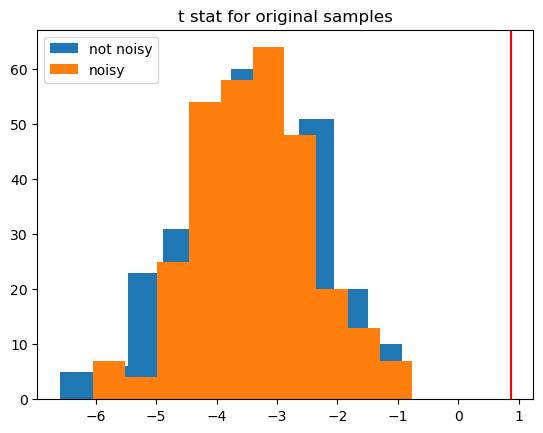

In [266]:
plt.hist(real_t_stat, label='not noisy')
plt.hist(real_t_stat_noisy, label='noisy')
plt.axvline(x=t_stat_noisy, color='r')
plt.legend()
plt.title('t stat for original samples')
plt.show()

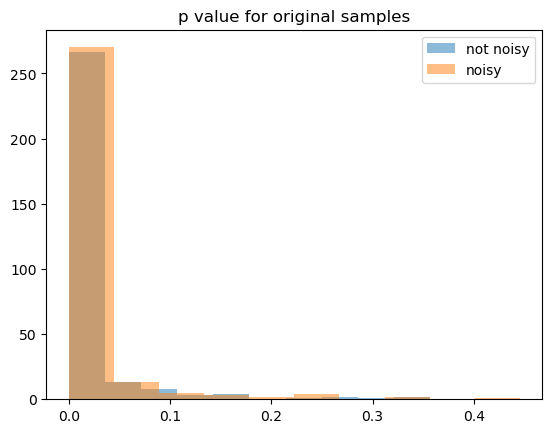

In [267]:
plt.hist(real_pvalue, alpha=0.5, label='not noisy')
plt.hist(real_pvalue_noisy, alpha=0.5, label='noisy')
plt.legend()
plt.title('p value for original samples')
plt.show()

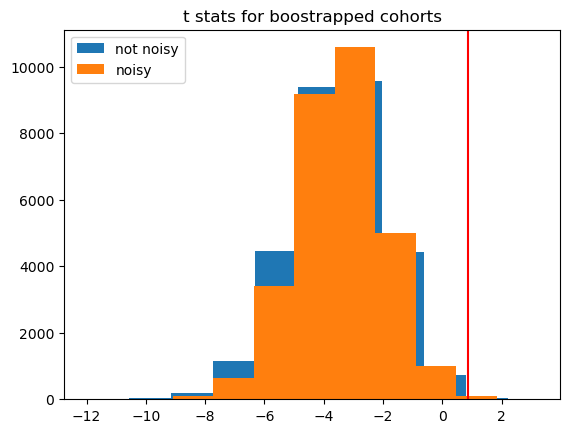

In [268]:
plt.hist(np.ravel(t_stat_bootstrap), label='not noisy')
plt.hist(np.ravel(t_stat_noisy_bootstrap), label='noisy')
plt.axvline(x=t_stat_noisy, color='r')
plt.legend()
plt.title('t stats for boostrapped cohorts')
plt.show()

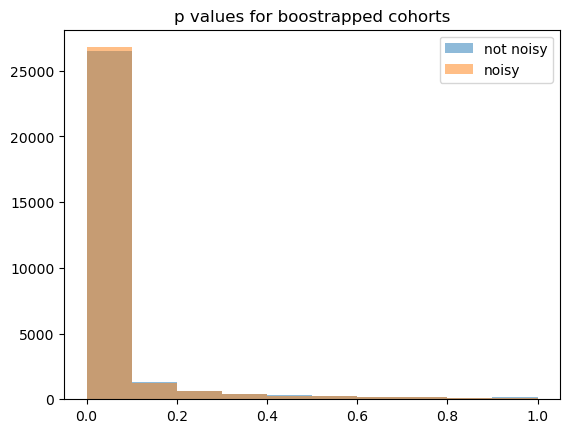

In [269]:
plt.hist(np.ravel(pvalue_bootstrap), alpha=0.5, bins=10, label="not noisy")
plt.hist(np.ravel(pvalue_noisy_bootstrap), alpha=0.5, bins=10, label='noisy')
plt.legend()
plt.title('p values for boostrapped cohorts')
plt.show()

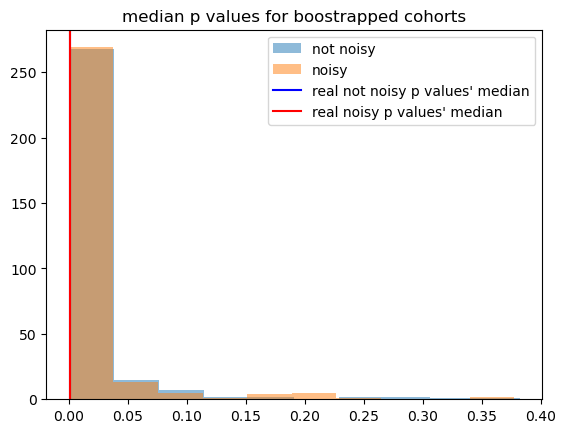

In [281]:
median_pvalue_bootstrap_noisy = np.median(pvalue_noisy_bootstrap, axis=1)
median_pvalue_bootstrap = np.median(pvalue_bootstrap, axis=1)
plt.hist(median_pvalue_bootstrap, alpha=0.5, bins=10, label="not noisy")
plt.hist(median_pvalue_bootstrap_noisy, alpha=0.5, bins=10, label='noisy')
plt.axvline(x=np.median(real_pvalue), color='b', label="real not noisy p values' median")
plt.axvline(x=np.median(real_pvalue_noisy), color='r', label="real noisy p values' median")
plt.legend()
plt.title('median p values for boostrapped cohorts')
plt.show()

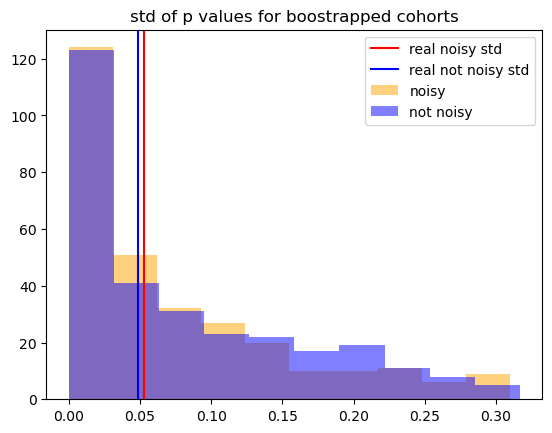

In [271]:
plt.axvline(np.std(real_pvalue_noisy), color='r', label='real noisy std')
plt.axvline(np.std(real_pvalue), color='b', label='real not noisy std')
plt.hist(np.std(pvalue_noisy_bootstrap, axis=1), alpha=0.5, bins=10, label='noisy', color='orange')
plt.hist(np.std(pvalue_bootstrap, axis=1), alpha=0.5, bins=10, label='not noisy', color='blue')
plt.legend()
plt.title('std of p values for boostrapped cohorts')
plt.show()

In [272]:
np.std(pvalue_bootstrap, axis=1).shape

(300,)

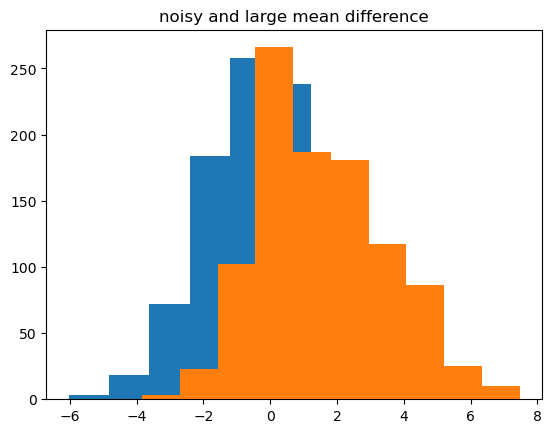

In [273]:
n = 1000
plt.hist(np.random.normal(mean1, sigma_comulative, n))
concat = np.concatenate([np.random.normal(mean_, sigma, int((1-ratio)*n)),
                         np.random.normal(mean_prime, sigma_prime, int(ratio*n))])
plt.hist(concat)
plt.title("noisy and large mean difference")
plt.show()

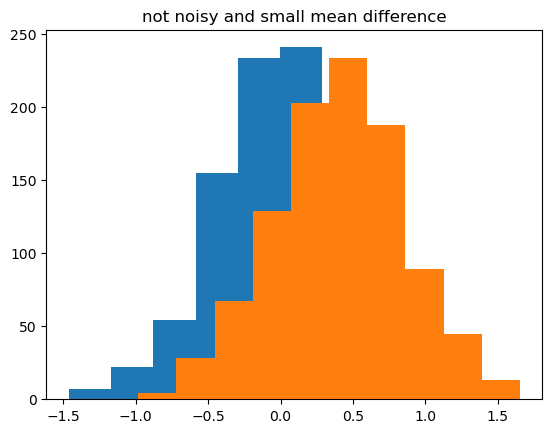

In [274]:
plt.hist(np.random.normal(mean1, sigma2, n))
plt.hist(np.random.normal(mean2, sigma2, n))
plt.title("not noisy and small mean difference")
plt.show()

In [275]:
mean2/sigma2

0.8726029437469813

In [276]:
mean_comulative/sigma_comulative

0.8726029437469813